# Importing Libraries

In [67]:
import streamlit as st
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# read the dataset

In [70]:
df = pd.read_csv("covid-19 symptoms dataset.csv")
df.head

<bound method NDFrame.head of       fever  bodyPain  age  runnyNose  diffBreath  infectionProb
0       102         0    9          0          -1              0
1       102         0   10          0           0              1
2       104         0   33          1          -1              0
3       101         1   59          0           1              0
4        99         0   98          0           0              0
...     ...       ...  ...        ...         ...            ...
2570     99         0   90          0           0              1
2571    100         0   53          0          -1              1
2572    101         0   44          1           0              0
2573    102         0   97          0          -1              1
2574    104         1   62          1          -1              1

[2575 rows x 6 columns]>

# divide the data

In [73]:
is_null=df.isna().sum()
print(is_null)

# Features and target
X = df.drop("infectionProb", axis=1)
y = df["infectionProb"]


fever            0
bodyPain         0
age              0
runnyNose        0
diffBreath       0
infectionProb    0
dtype: int64


In [75]:
# Convert to NumPy arrays and correct data types
X = np.array(X).astype(np.float32)
y = np.array(y).astype(np.float32)

from tensorflow.keras import backend as K
K.clear_session()


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import numpy as np
X_train = np.array(X_train)
y_train = np.array(y_train)

# Build a Neural Network Model

In [78]:
model = Sequential([
    Dense(8, input_dim=X_train.shape[1], activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification (0 or 1)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\rkave\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Training and Evaluate the model

In [81]:
model.fit(X_train, y_train, epochs=10, batch_size=2)


loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
st.write(f"Model Accuracy: {accuracy * 100:.2f}%")


Epoch 1/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5319 - loss: 1.2160
Epoch 2/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4947 - loss: 0.7357
Epoch 3/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4965 - loss: 0.7203
Epoch 4/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5072 - loss: 0.7193
Epoch 5/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5123 - loss: 0.7283
Epoch 6/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4802 - loss: 0.7244
Epoch 7/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5029 - loss: 0.7206
Epoch 8/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5274 - loss: 0.7140
Epoch 9/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5104 - loss: 0.7112
Epoch 10/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5377 - loss: 0.7004


# Streamlit Web App for Prediction

In [83]:
import streamlit as st
st.title("COVID-19 Detection Web App")
st.write("Enter the symptoms to predict if a person has COVID-19:")

# User Input Fields

In [85]:
fever = st.selectbox("Fever (1 = Yes, 0 = No)", [0, 1])
cough = st.selectbox("Cough (1 = Yes, 0 = No)", [0, 1])
difficulty_breathing = st.selectbox("Difficulty Breathing (1 = Yes, 0 = No)", [0, 1])

# Predict Button

In [87]:
if st.button("Predict COVID-19 Status"):
    input_features = np.array([[fever, cough, difficulty_breathing]], dtype=np.float32)

    prediction = model.predict(input_features, verbose=0)
    prediction_class = "COVID-19 Positive" if prediction[0][0] > 0.5 else "COVID-19 Negative"

    st.write(f"The model predicts: {prediction_class}")

# showig the outputin web

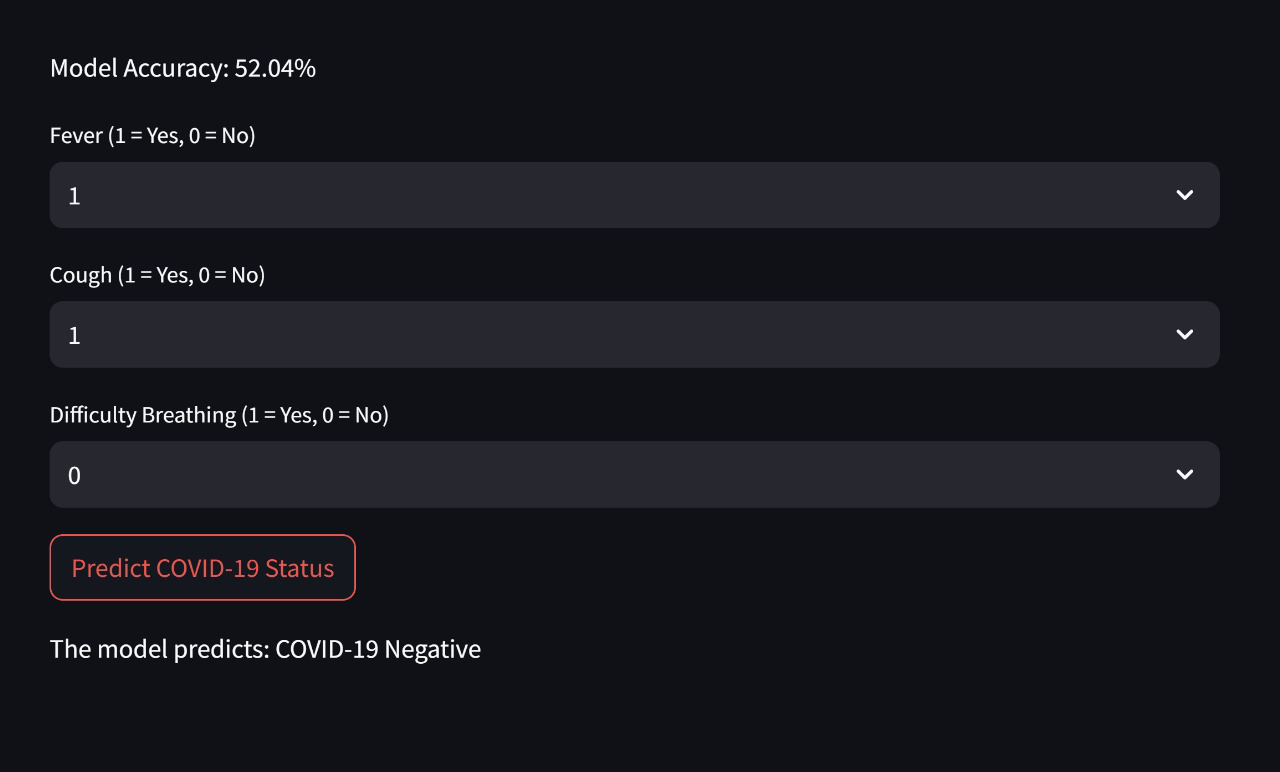

In [109]:
from IPython.display import display
from PIL import Image

img = Image.open(r"C:\Users\rkave\OneDrive\Desktop\projects\cov.jpg")
display(img)
